# ANALYSIS OF DISCRETE RANDOM VARIABLES
# PROBLEM STATEMENT

* Estimate $\pi$ by the area method and calculate the total number of points needed for our estimate to be within + or - 1% of the true value of $\pi$ with probability 0.95

* Estimate the value of e with Monte Carlo method.

* Estimate the value of n integral with the help of Monte Carlo integral method.


In [2]:
import numpy as np
import sklearn as sk
import scipy.stats as sci
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.mlab as mlab
import seaborn as sns
import warnings
import scipy.stats as st
import operator
from scipy.stats import binom
from scipy.stats import geom
warnings.filterwarnings('ignore')
%matplotlib inline
fontP = FontProperties()
fontP.set_size('small')
np.random.RandomState(seed=42)

# Function Definitions

In [3]:
def plot_densityCurve(*args):
    plt.figure(figsize=(9,4), dpi=300)
    sns.distplot(args[0],kde_kws=args[1])
    plt.axvline(args[5], color='yellow', linestyle='-.', linewidth=1,label='sample mean')
    plt.axvline(args[5]-args[6], color='black', linestyle=':', linewidth=1,label='1 standard dev')
    plt.axvline(args[5]+args[6], color='black', linestyle=':', linewidth=1)
    plt.axvline(args[7], color='purple', linestyle='-.', linewidth=2,label='True mean')
    plt.axvline(args[5]-(1.96*args[6]),color='black',linewidth=2,label='95% confidence line')
    plt.axvline(args[5]+(1.96*args[6]),color='black',linewidth=2)
    plt.xlim(0.72,0.85)
    plt.legend()
    plt.title("The sampling distribution with "+str(args[3])+" samples of size n="+str(args[4]))
    plt.show()

def generate_sampling_distribution(num_samples,sample_size):
    plt.figure(figsize=(9,4), dpi=300)
    P_hat_sampling_dist = []
    for i in range(0,num_samples):
        ###############Generate pair Uniform Random variable################
        np.random.RandomState(seed=42)
        n = sample_size
        X = np.random.uniform(0,1,n)
        Y = np.random.uniform(0,1,n)
        
        ####Z decides whether the points are inside or outside the quadrant####
        Z = (X**2) + (Y**2)

        ##Pi is the random variable that denotes if point is in the quadrant##
        Pi = np.zeros(shape=Z.shape)
        Pi[Z <= 1] = 1
        P_hat = np.sum(Pi)/Pi.shape[0]
        P_hat_sampling_dist.append(P_hat)
        
    #plt.hist(P_hat_sampling_dist,bins=30,color='orange',alpha=0.4,edgecolor='red')
    density_dic = {'color':'red'}
    hist_dic = {'color':'green','edgecolor':'orange','alpha':0.4}
    sns.distplot(P_hat_sampling_dist,kde_kws=density_dic,hist_kws=hist_dic)
    plt.title('Distribution with sample size: '+str(1000)+' and total samples: '+str(1000))

def running_mean(sample_size,*args):
    P_hat_running = []
    st_dev_running = []
    n = sample_size
    for size in range(0,n):
        X = np.random.uniform(0,1,size)
        Y = np.random.uniform(0,1,size)
        
        ####Z decides whether the points are inside or outside the quadrant####
        Z = (X**2) + (Y**2)
        ##Pi is the random variable that denotes if point is in the quadrant##
        Pi = np.zeros(shape=Z.shape)
        Pi[Z <= 1] = 1
        P_hat = np.sum(Pi)/Pi.shape[0]
        sample_var_Pi = np.sum((Pi-P_hat)**2)/(Pi.shape[0]-1)
        s_2 = sample_var_Pi/Pi.shape[0]
        std_sampling_dist = np.sqrt(s_2)
        P_hat_running.append(P_hat)
        st_dev_running.append(std_sampling_dist)
        
    
    P_hat_running = np.array(P_hat_running)
    st_dev_running = np.array(st_dev_running)
    y1 = P_hat_running+st_dev_running
    y2 = P_hat_running-st_dev_running
    x = list(range(0,n))
    plt.figure(figsize=(16,6),dpi=300)
    plt.plot(x,P_hat_running,linewidth=1,color=args[0],label='running mean')
    plt.axhline(np.pi/4,color=args[1], linestyle='-.', linewidth=2,label='True mean')
    plt.fill_between(x,y1,y2,interpolate=True,alpha=0.3,color=args[2],label='1 stdev',edgecolor=None)
    plt.title("Graph of successive values of estimators with sample size "+str(sample_size))
    plt.xlabel('Number of samples')
    plt.ylabel('Point estimate(sample_mean)')
    plt.legend()
    plt.show()

def drawCards(N,ax=None,**kwargs):
    
    cards = np.random.randint(1,N+1,N)
    unique_cards = dict()
    
    for card in cards:
        if(unique_cards.get(card) == None):
            unique_cards[card] = 1
        else:
            unique_cards[card] += 1
    

    #sorted_cards = sorted(unique_cards.items(), key=operator.itemgetter(1))
    #unique_cards_sorted = dict(sorted_cards)
    #print(len(unique_cards_sorted))
    
    P_0 = []
    count_dict_prob = dict()
    #print(unique_cards)
    for i in range(1,N+1):
        if(unique_cards.get(i) == None):
            prob = binom.pmf(0,N,(1/N))
            if(count_dict_prob.get(0) == None):
                count_dict_prob[0] = [prob]
            else:
                count_dict_prob[0].append(prob)
            #print(i," :",prob)
            P_0.append(prob)
        else:
            prob = binom.pmf(unique_cards.get(i),N,(1/N))
            #print(i," :",prob)
            if(count_dict_prob.get(unique_cards.get(i)) == None):
                count_dict_prob[unique_cards.get(i)] = [prob]
            else:
                count_dict_prob[unique_cards.get(i)].append(prob)
            P_0.append(prob)
    
    count_final_dict = dict()
    
    for key,value in count_dict_prob.items():
        if(len(value) > 1):
            avg_prob = np.average(value)
            count_final_dict[key] = avg_prob
        else:
            count_final_dict[key] = value[0]
            
    count = []
    count_prob = []
    
    for k,v in count_final_dict.items():
        count.append(k)
        count_prob.append(v)
    
    #ax.bar(count,count_prob,color=args[0],edgecolor=args[1],alpha=0.4)
    ax.set_title('The average probabilities of seeing '+str(N)+' number of cards',size=5)
    ax.set_xlabel('number of occurances(j)')
    ax.set_ylabel('P(j)')
    ax.set_ylim(0,0.5)
    ax.axhline(1/np.exp(1),color='k', linestyle='-.', linewidth=2,label='1/e line')
    plt.subplots_adjust(hspace=0.5)
    ax.legend()
    return ax.bar(count,count_prob,**kwargs)
    #plt.show()
            
def plot_norm(sample_mean,SE,*args):
    plt.figure(figsize=(9,4), dpi=300)
    x_values = np.random.normal(loc = sample_mean,scale=SE,size=args[0])
    x_values = np.sort(x_values)
    y_values = st.norm.pdf(x_values,loc = sample_mean,scale=SE)
    plt.plot(x_values,y_values,linewidth=2,color='green')
    plt.axvline(sample_mean, color='yellow', linestyle='-.', linewidth=2,label='sample mean')
    plt.axvline(sample_mean-SE, color='black', linestyle=':', linewidth=1,label='1 standard dev')
    plt.axvline(sample_mean+SE, color='black', linestyle=':', linewidth=1)
    plt.axvline(args[1], color='purple', linestyle='-', linewidth=1,label='95% confidence line')
    plt.axvline(args[2], color='purple', linestyle='-', linewidth=1)
    x_95 = x_values[np.logical_and(x_values>=args[1],x_values<=args[2])]
    y_95 = y_values[np.logical_and(x_values>=args[1],x_values<=args[2])]
    plt.fill_between(x_95,0,y_95,color='red',alpha=0.4)
    plt.ylim(0,10)
    plt.legend()
    plt.show()        
        
    
    
    

#  THEORETICAL EXPLORATION

* $\textbf{Uniform random variable}$:For a uniform random variable X ~ U(a,b) the equations of mean and variance are as follows:

    *  $E[X] = \mu = \frac{(a+b)}{2}$

    *  $var(X) = \sigma_X^2 = \frac{a^2+ab+b^2}{12}$
 
 
* $\textbf{Bernoulli random variable}$:For a Bernoulli random variable the equations of mean and variance are as follows:
    
    *  $E[X] = \mu$ = p

    *  $var(X) = \sigma_X^2$ = p(1-p)
    
    
* $\textbf{Confidence Interval}$: A confidence tells us how confident we are that our point estimate lies in a certain interval. The confidence interval tries to capture only the population parameter. For example if we generate a 95% confidence interval with our point estimate being in a certain range we can say that we are 95% confident that the true population parameter would lie in this range.


* $\textbf{Monte Carlo Integral}$: 

    * Consider the definite integral: I = $\int_{a}^{b} f(x) dx$
    
    * Consider                      : J = $\int_{a}^{b} f(x)*U_{ab}(x) dx$
    
    * Also the pdf of uniform variable is given by: $U_{ab}(x) = \frac{1}{V} = \frac{1}{a-b}$
    
    * Then we can write: J = $\frac{I}{V}$
    
    * Thus I = J * V =  $V * \lim_{n\to\infty} \sum_{i=1}^{n} f(x_i)$
    

# EXPERIMENTS AND RESULTS

## 1.) Estimating the value of $\pi$

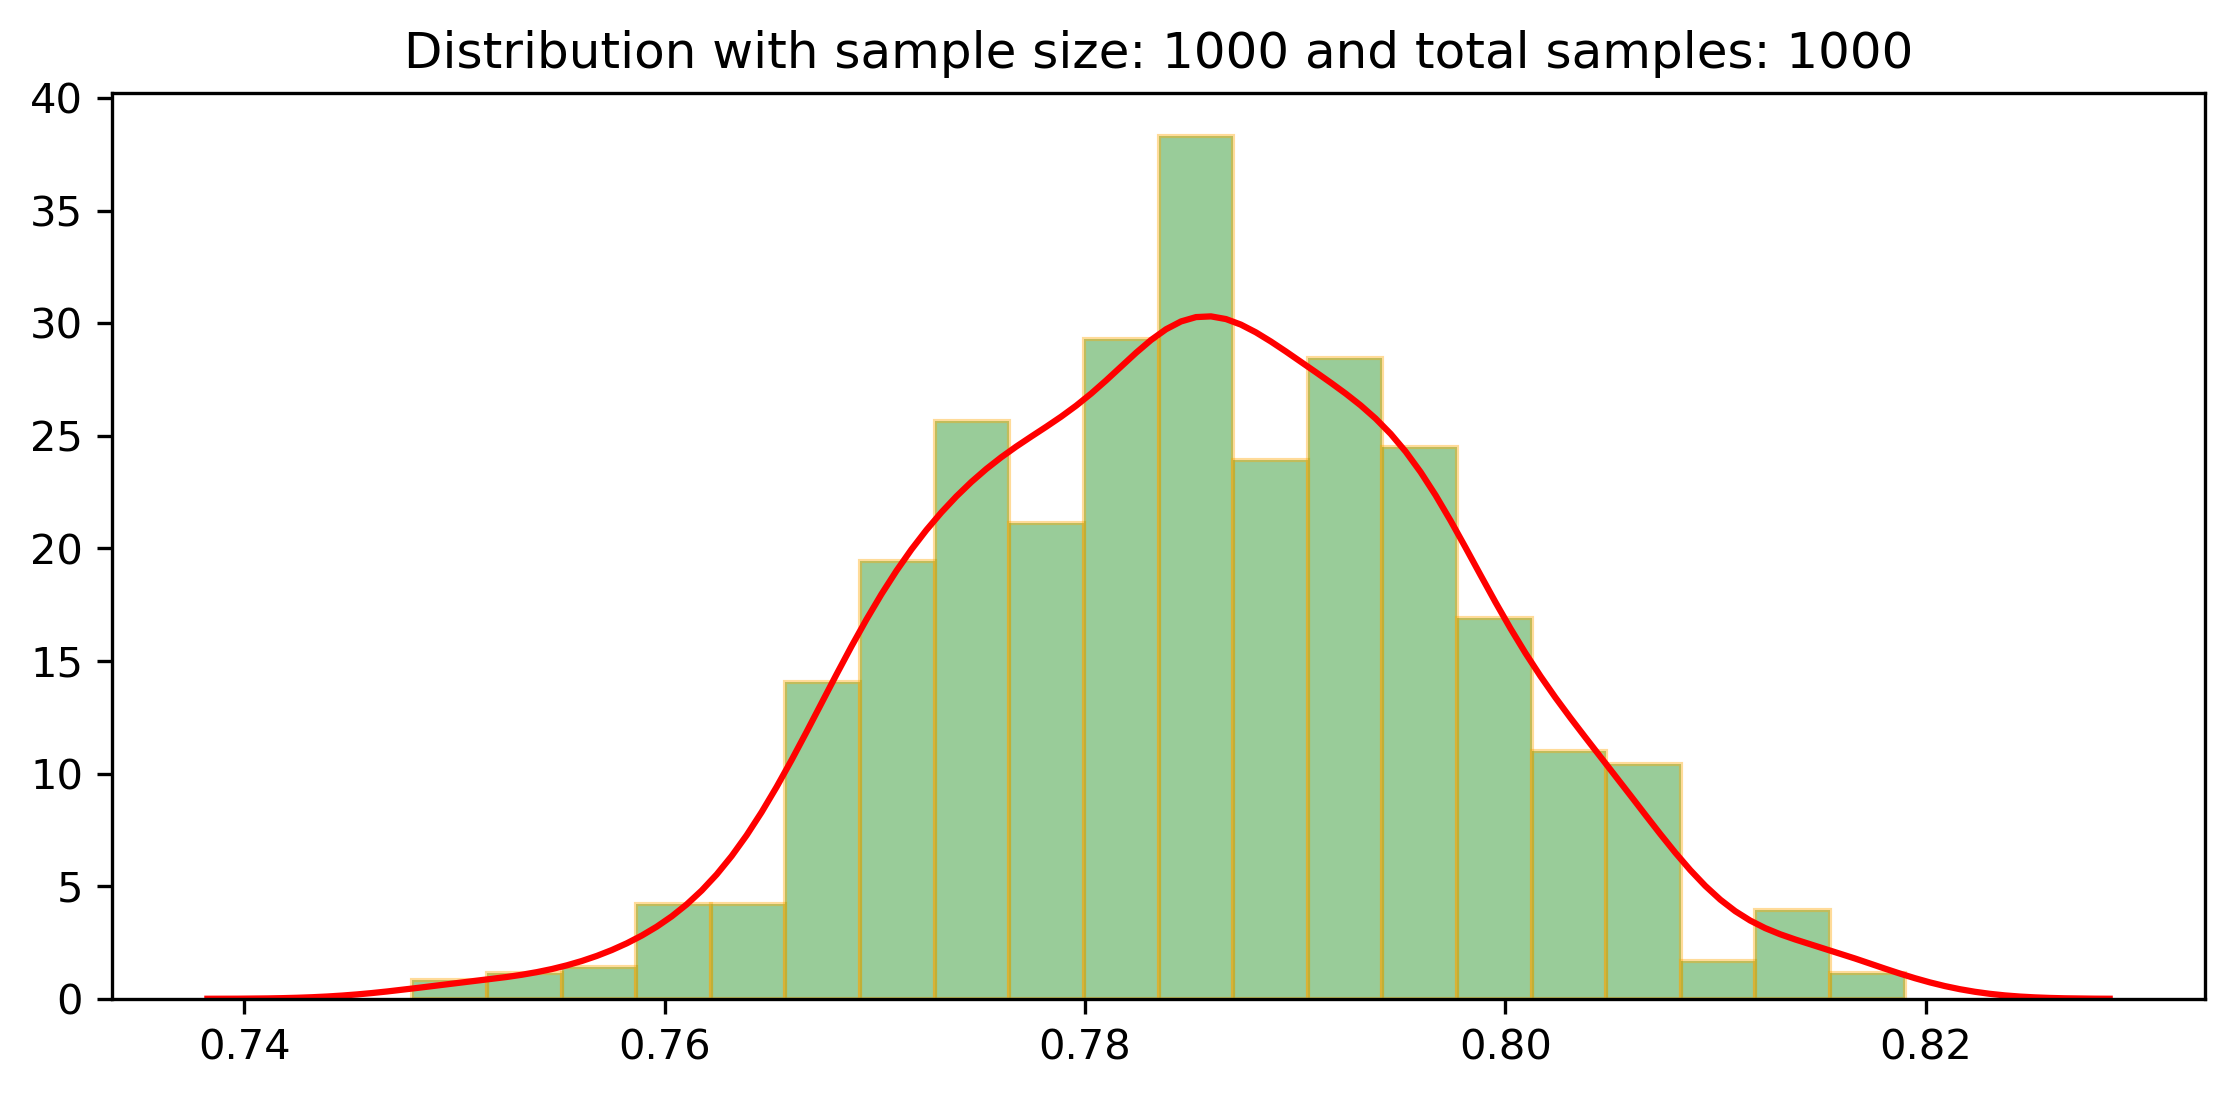

In [4]:
generate_sampling_distribution(1000,1000)

* There are two things we need to take care of when we are considering a particular statistic of a random variable:
    * Population parameters: These parameters are mean($\mu$) and variance($\sigma_X^2$). These polupation parameters capture the real underlying mean and variance of the population. Generally speaking they are unknown to us as we will have to take the data of all the entities in order to calculate the true parameters.
    
         * For example: If we consider the weights of all the males in United states, we will have to measure the weights of each and every persons' weight in order to get the true mean and true variance.
         
    * Point Estimates: As mentioned above instead of measuring the value of each and every entity and wasting our resources we can rather sample randomly from the population and measure the mean and variance of that sample mean. This is known as sample mean(p_hat) and sample variance($s^2$). In the example that I mentioned above a sample can be a finite or small number of males selected independently. 
        * The property of this sample mean and variance is that it tends to vary around the true mean($\mu$) and true variance($\sigma_X^2$). Infact there is a trend in which if the sample size is less then the sample mean(m) tends to be far from the true mean($\mu$) and if the sample size is more then the sample mean(m) tends to be very close to the true mean($\mu$). This this is evident from the distribution that I have generated above.
        * This is the distribution of the sample means(p_hat). 1000 values are slected randomly and this process is carried a further 1000 times. The intution behind this is that since we are sampling the values randomly, we will cover most of the population values when we create such sample values a 1000 times. Thus most of the point estimates would be around the true mean and this is evident from the graph above. Most of the values are centered around a particular value and as we go farther away from that particular value(True mean) the density decreases. Such a trend is typical of a normally distributed data. The kernel density estimate of the histogram shows this clearly.

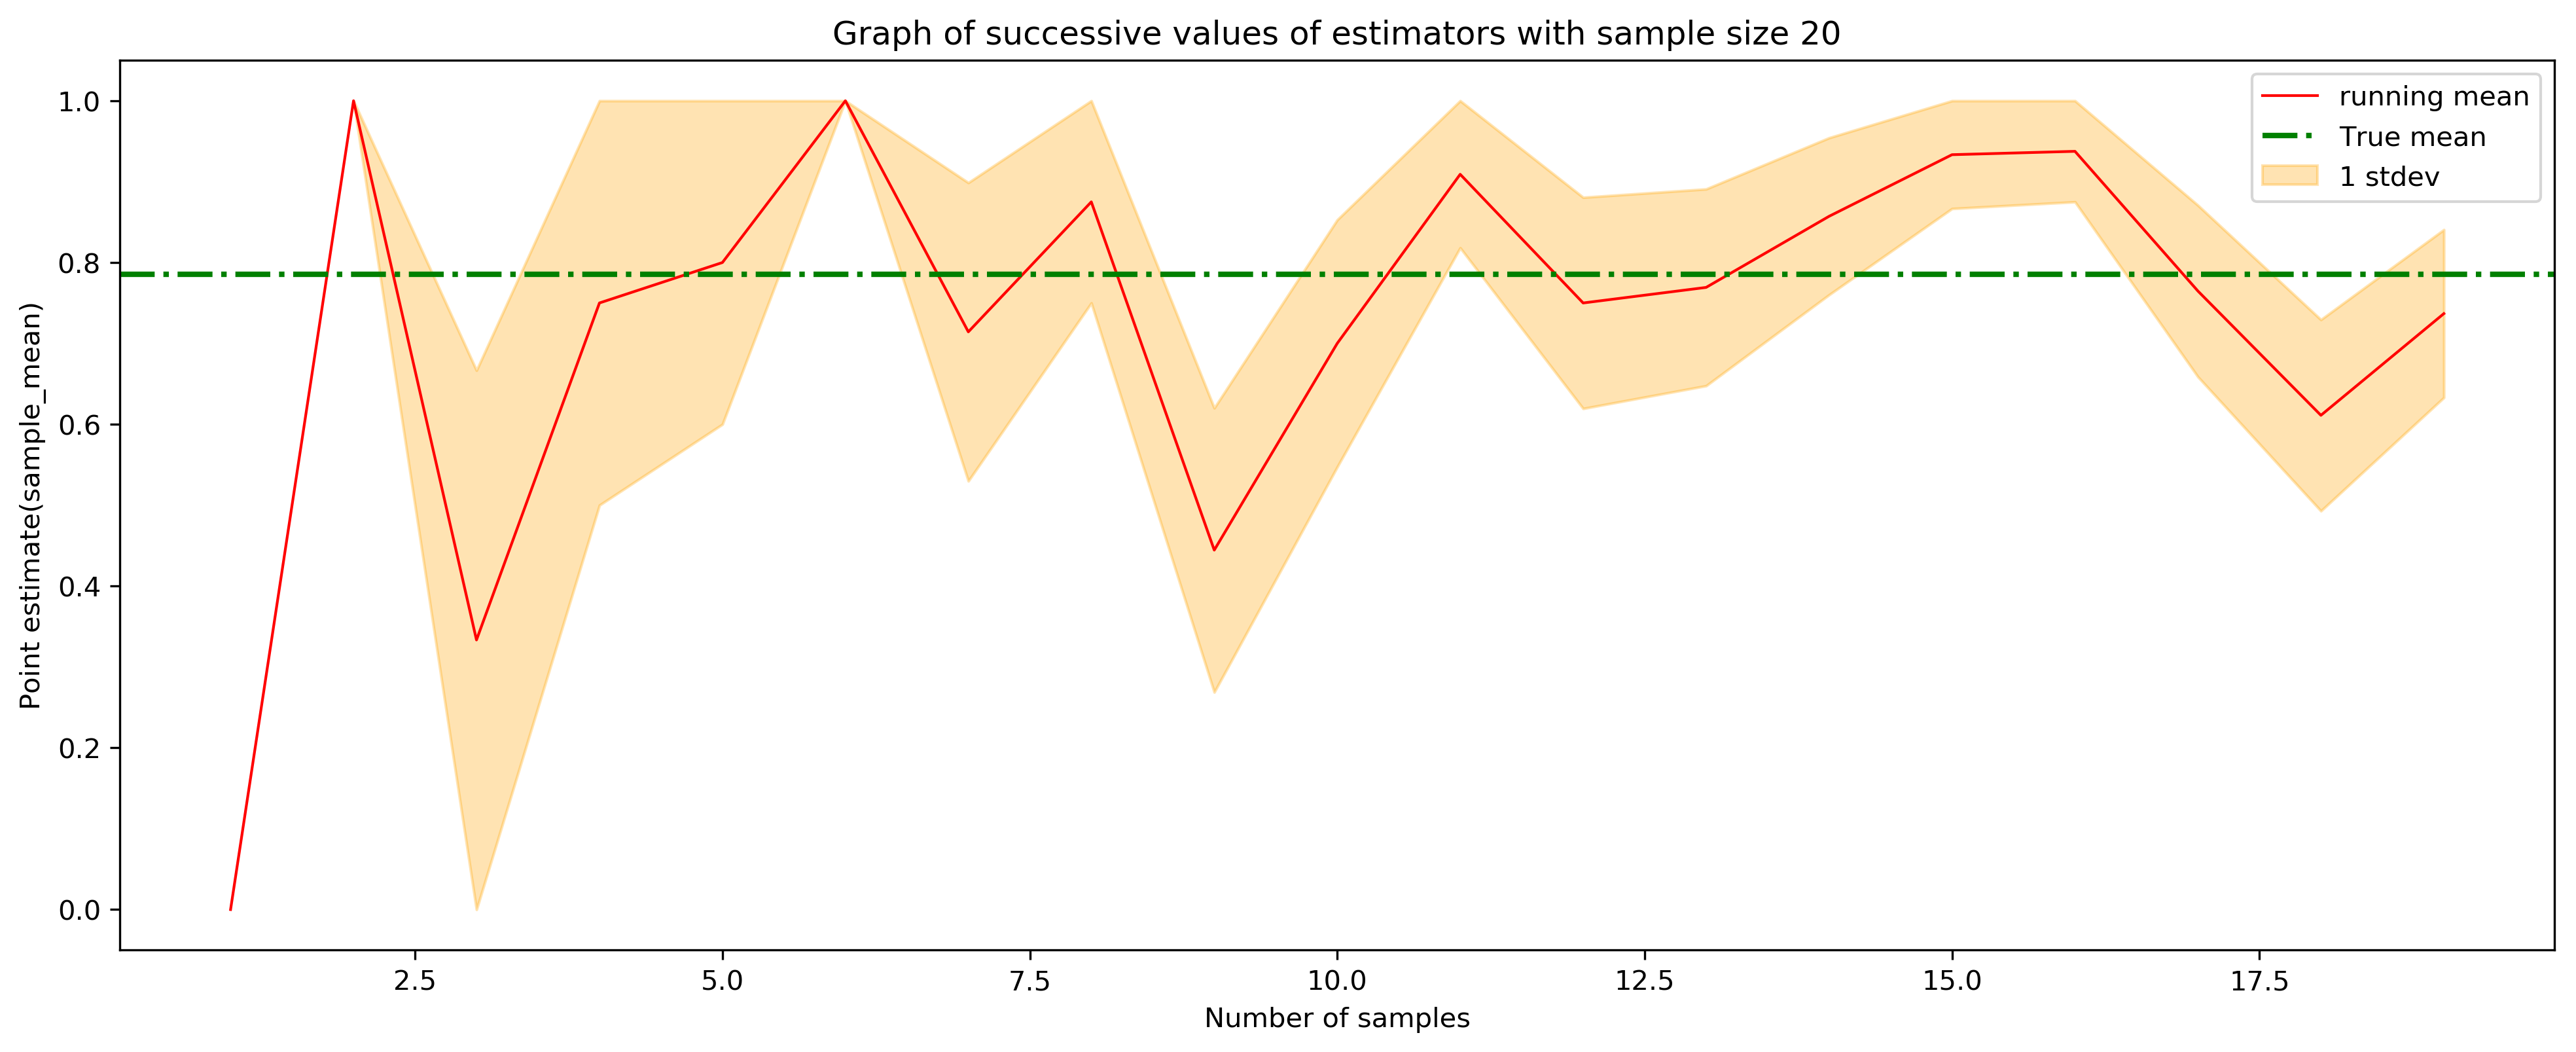

In [5]:
running_mean(20,'red','green','orange')

* The above graph depicts the running mean. This is nothing but the point estimate or the sample mean with variable number of sample sizes. 

* The maximum sample size in this graph is 20. The reason for such low sample size is that, even with such low values it should be noted as we increase the sample size the point estimate tends to move closely to the true mean.

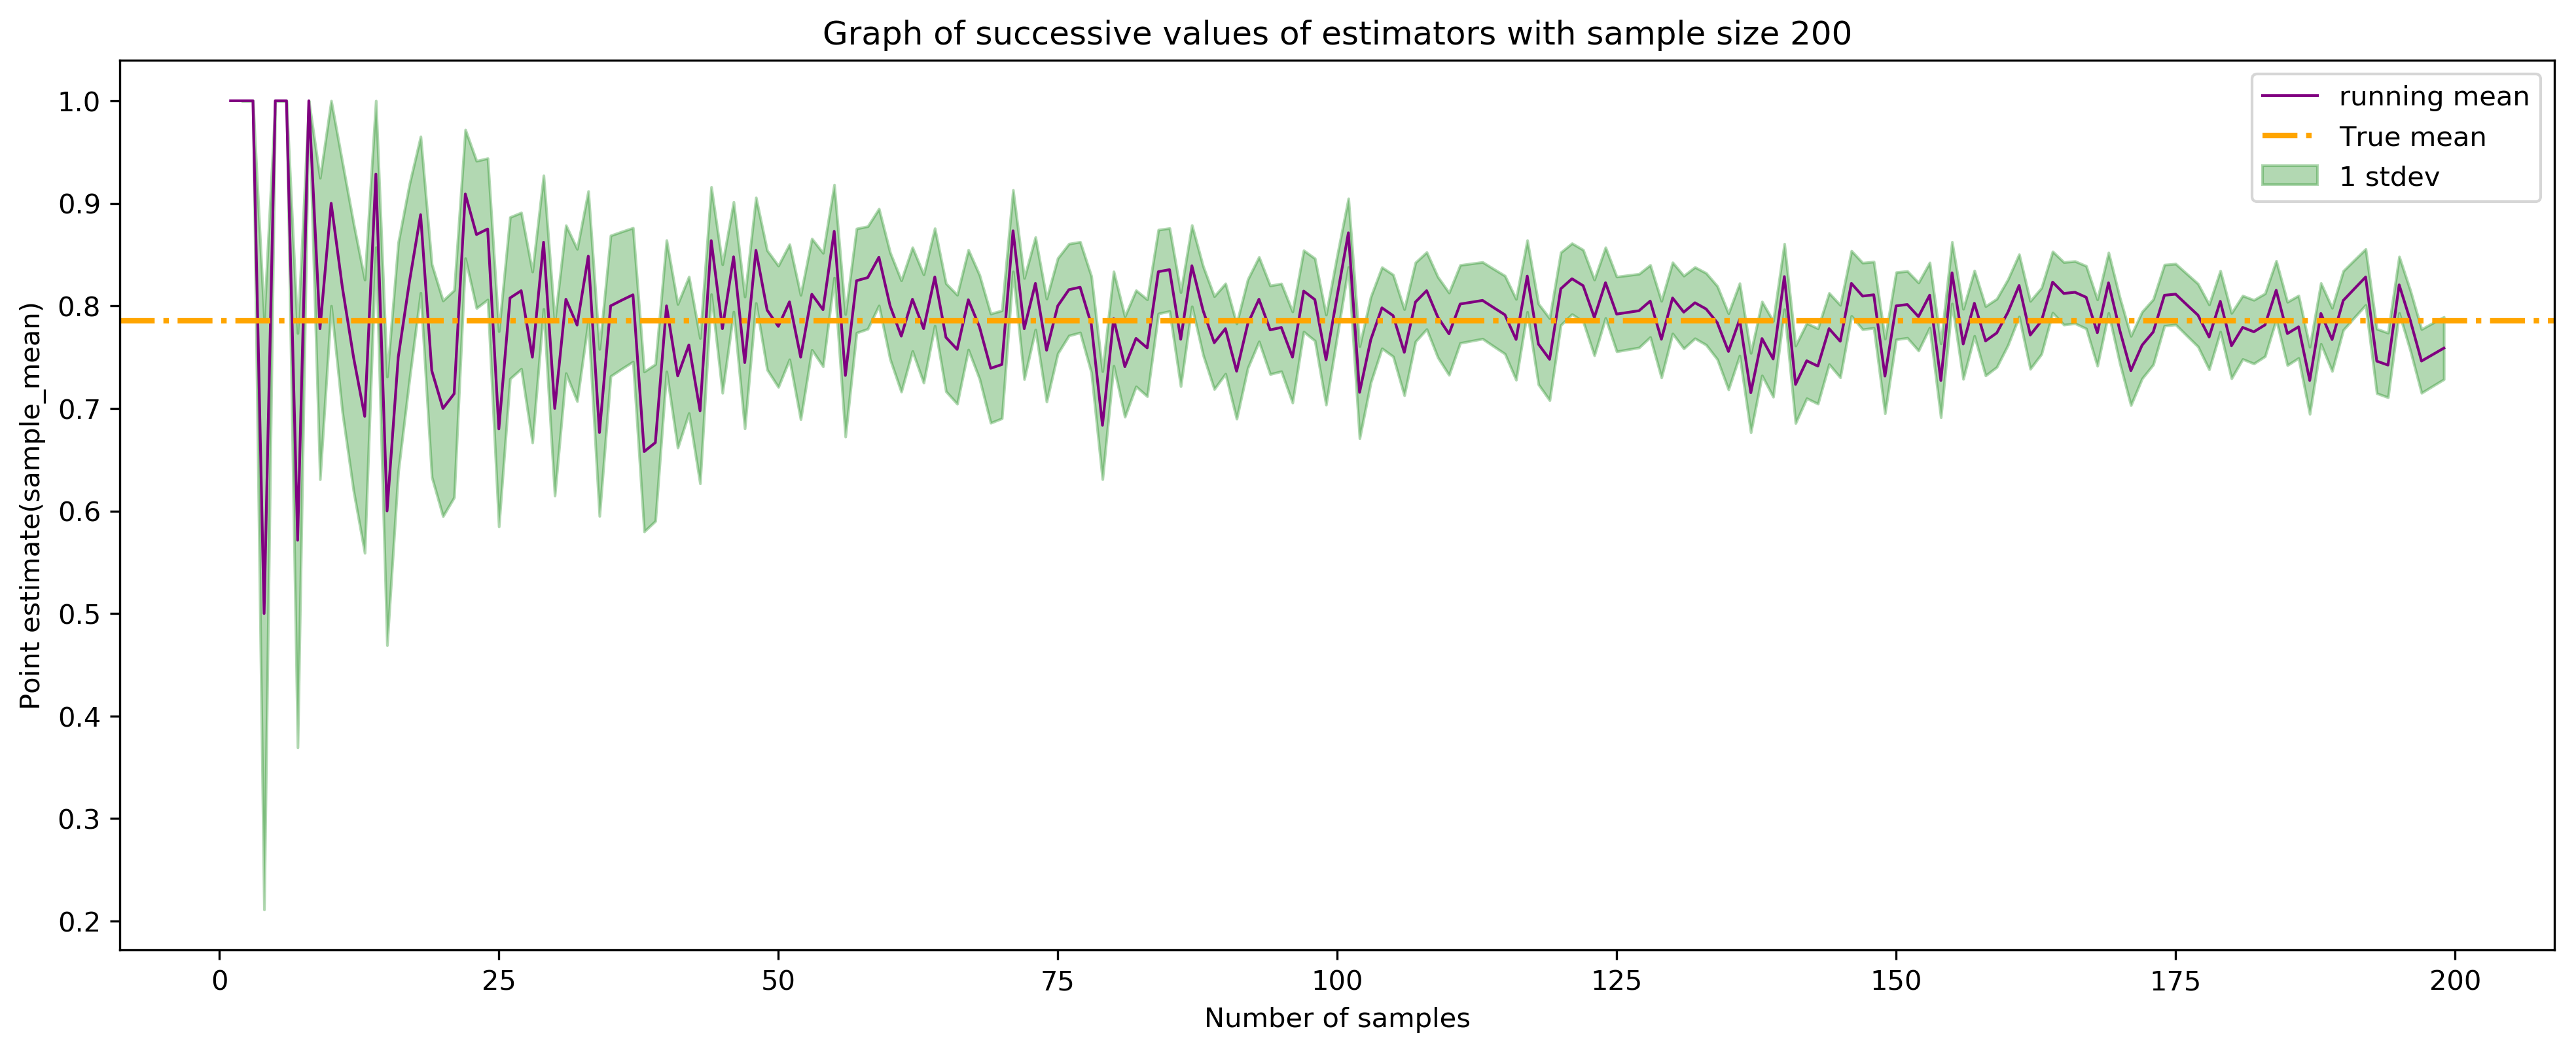

In [6]:
running_mean(200,'purple','orange','green')

* Increasing the maximum sample size, makes this trend even more visible. It should also be noted that as we increase the sample size , the standard deviation of the sampling distribution is also reducing. 

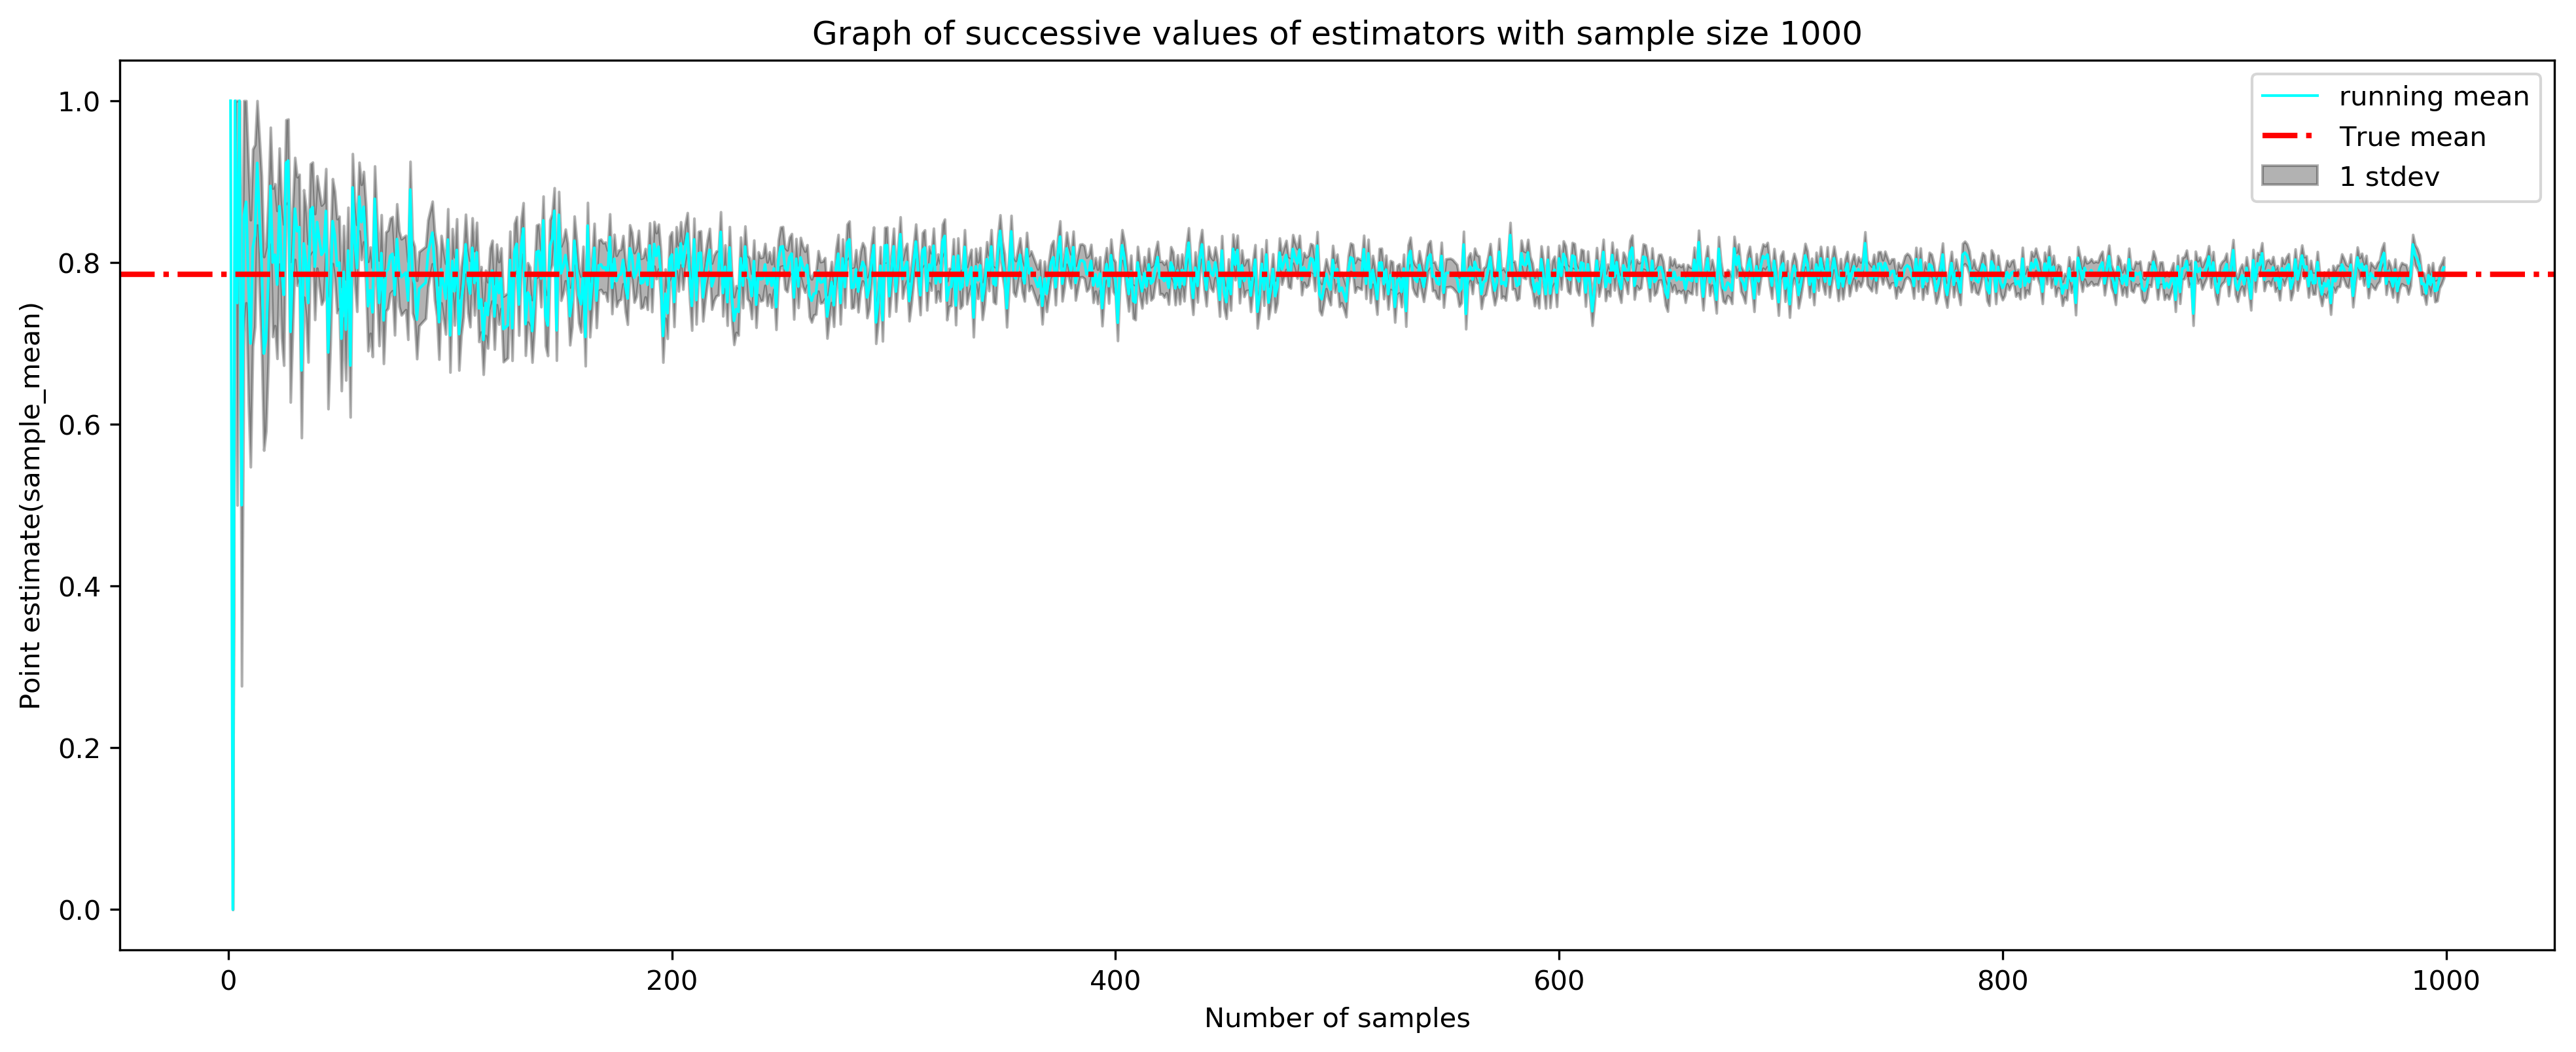

In [7]:
running_mean(1000,'cyan','red','black')

* Finally as the sample size increase to a very high level the deviation of the point estimate from the true parameter is even less.

* The reason for this is that, as we take in more and more sample we are actually accumulating more and more information about our population and hence the mean of such a sample also tends to be near to the actual true mean. 

* $\textbf{Calculating total samples needed}$:
    
    * True parameter: $\frac{\pi}{4} = 0.7854 = p$
    
    * True variance: p(1-p) = 0.1685 = $\sigma_{p}^2$
    
    * True st_dev = $\sigma_{p} = 0.4105$
    
    * sample st_dev = $\sigma_{p_{hat}} = \frac{\sigma_{p}}{\sqrt{n}} = \frac{0.4105}{\sqrt{n}}$
    
    * Pr{$p - \beta*\sigma_{p_{hat}} <= p_{hat} <= p + \beta*\sigma_{p_{hat}} = 1- \alpha$
    
    * Pr{$0.7854 - \beta*\frac{0.4105}{\sqrt{n}} <= p_{hat} <= 0.7854 + \beta*\frac{0.4105}{\sqrt{n}}$}


* Now we need our interval to be +- 1% of the true value with 95% probability or 95% confidence level. 
    
    * Therefore $\alpha$ = 0.05
    
    * $\beta$ = 1.96
    
    * Therefore $0.99*0.7854 <= 0.7854 <= 1.01*0.7854$
    
    * Also we have Pr{$0.7854 - 1.96*\frac{0.4105}{\sqrt{n}} <= p_{hat} <= 0.7854 + 1.96*\frac{0.4105}{\sqrt{n}}$}
    
    * comparing above two points:
        
        * $0.7854 - 1.96*\frac{0.4105}{\sqrt{n}} = 0.99*0.7854$
        
        * $0.7854 - 1.96*\frac{0.4105}{\sqrt{n}} = 0.7775$
        
        * $\frac{0.8046}{\sqrt{n}} = 7.9 * 10^{-3}$
        
        * $\sqrt{n} = 101.846$
        
        * $n = 10,373$

In [8]:
true_mean = np.pi/4
###############Generate pair Uniform Random variable################

n = 10373
X = np.random.uniform(0,1,n)
Y = np.random.uniform(0,1,n)

####Z decides whether the points are inside or outside the quadrant####
Z = (X**2) + (Y**2)

##Pi is the random variable that denotes if point is in the quadrant##
Pi = np.zeros(shape=Z.shape)
Pi[Z <= 1] = 1

In [9]:
P_hat = np.sum(Pi)/Pi.shape[0]
sample_var_Pi = np.sum((Pi-P_hat)**2)/(Pi.shape[0]-1)
s_2 = sample_var_Pi/Pi.shape[0]
std_sampling_dist = np.sqrt(s_2)
print("The sample mean is:",P_hat)
print("The variance of sampling distribution is: ",s_2)
print("The standard error(st_dev of sampling distribution is): ",std_sampling_dist)

The sample mean is: 0.7836691410392365
The variance of sampling distribution is:  1.6345142539728285e-05
The standard error(st_dev of sampling distribution is):  0.004042912630731498


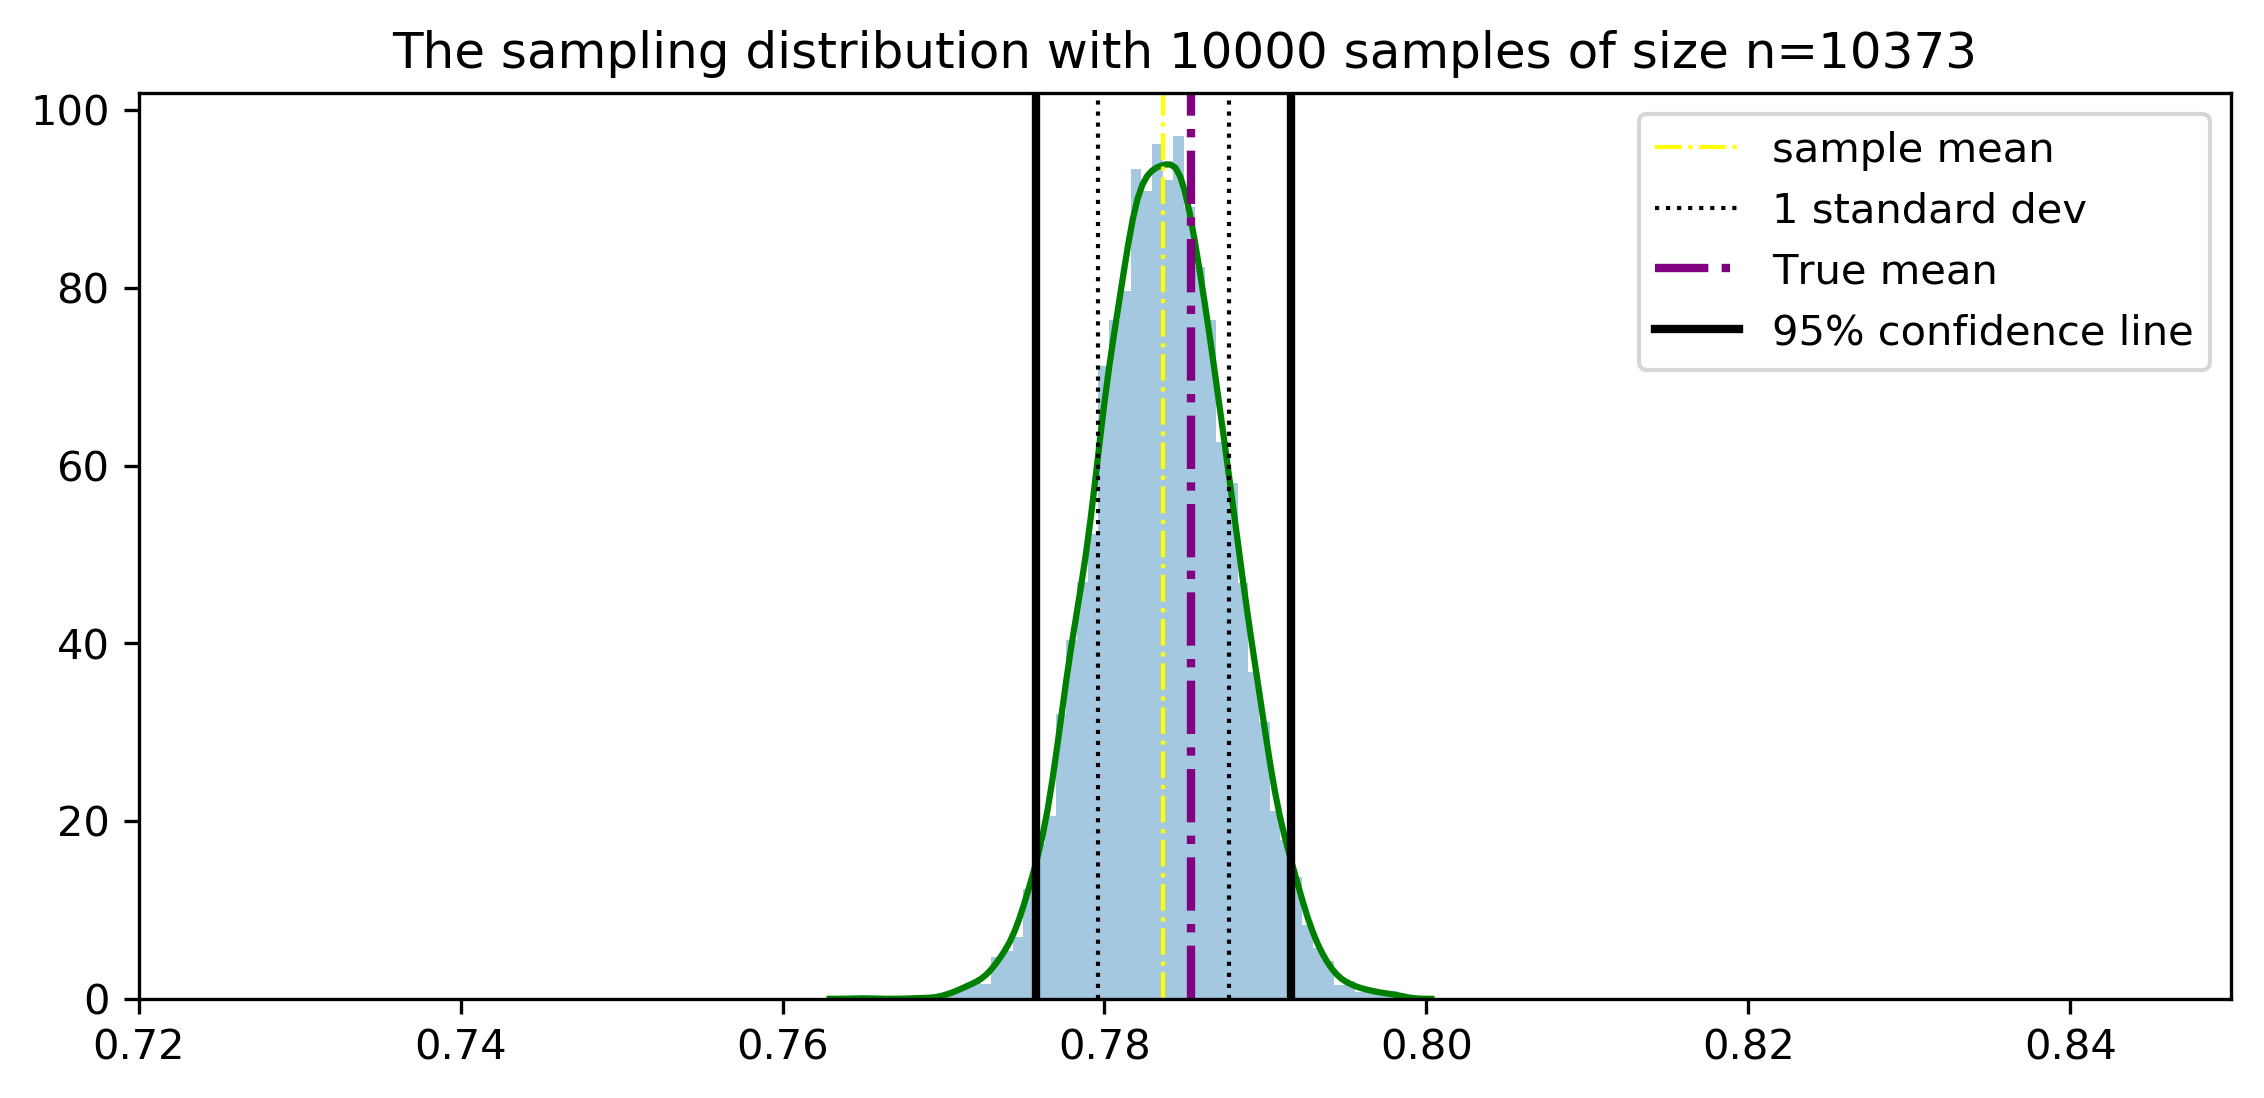

In [10]:

dist = np.random.normal(loc=P_hat,scale=std_sampling_dist,size = 10000)
density_prop = {"color": "green"}
hist_prop = {"alpha": 0.3, "color": "red"}
plot_densityCurve(dist,density_prop,hist_prop,dist.shape[0],Pi.shape[0],P_hat,std_sampling_dist,true_mean)


* $\textbf{Result}$: As we can see from the graph above our sample size of 10,373 indeed captures the true mean. This true mean lies in the 95 percent confidence interval.

|     Total samples   
| :--------------: | 
| 10,373           |   

## 2.)  Drawing cards(Estimating the value of e)

* A geometric distribution is used for modelling the number of failures until the first success. This comes in handy in our card picking game as the probability that any card would occur is very less.

* However the probability that a card will be selected j times is a binomial probability distribution. And it can be selected j times from N selections as follows:

    * $P_j = \binom{N}{j} \cdot p^j(1-p)^{N-j}$

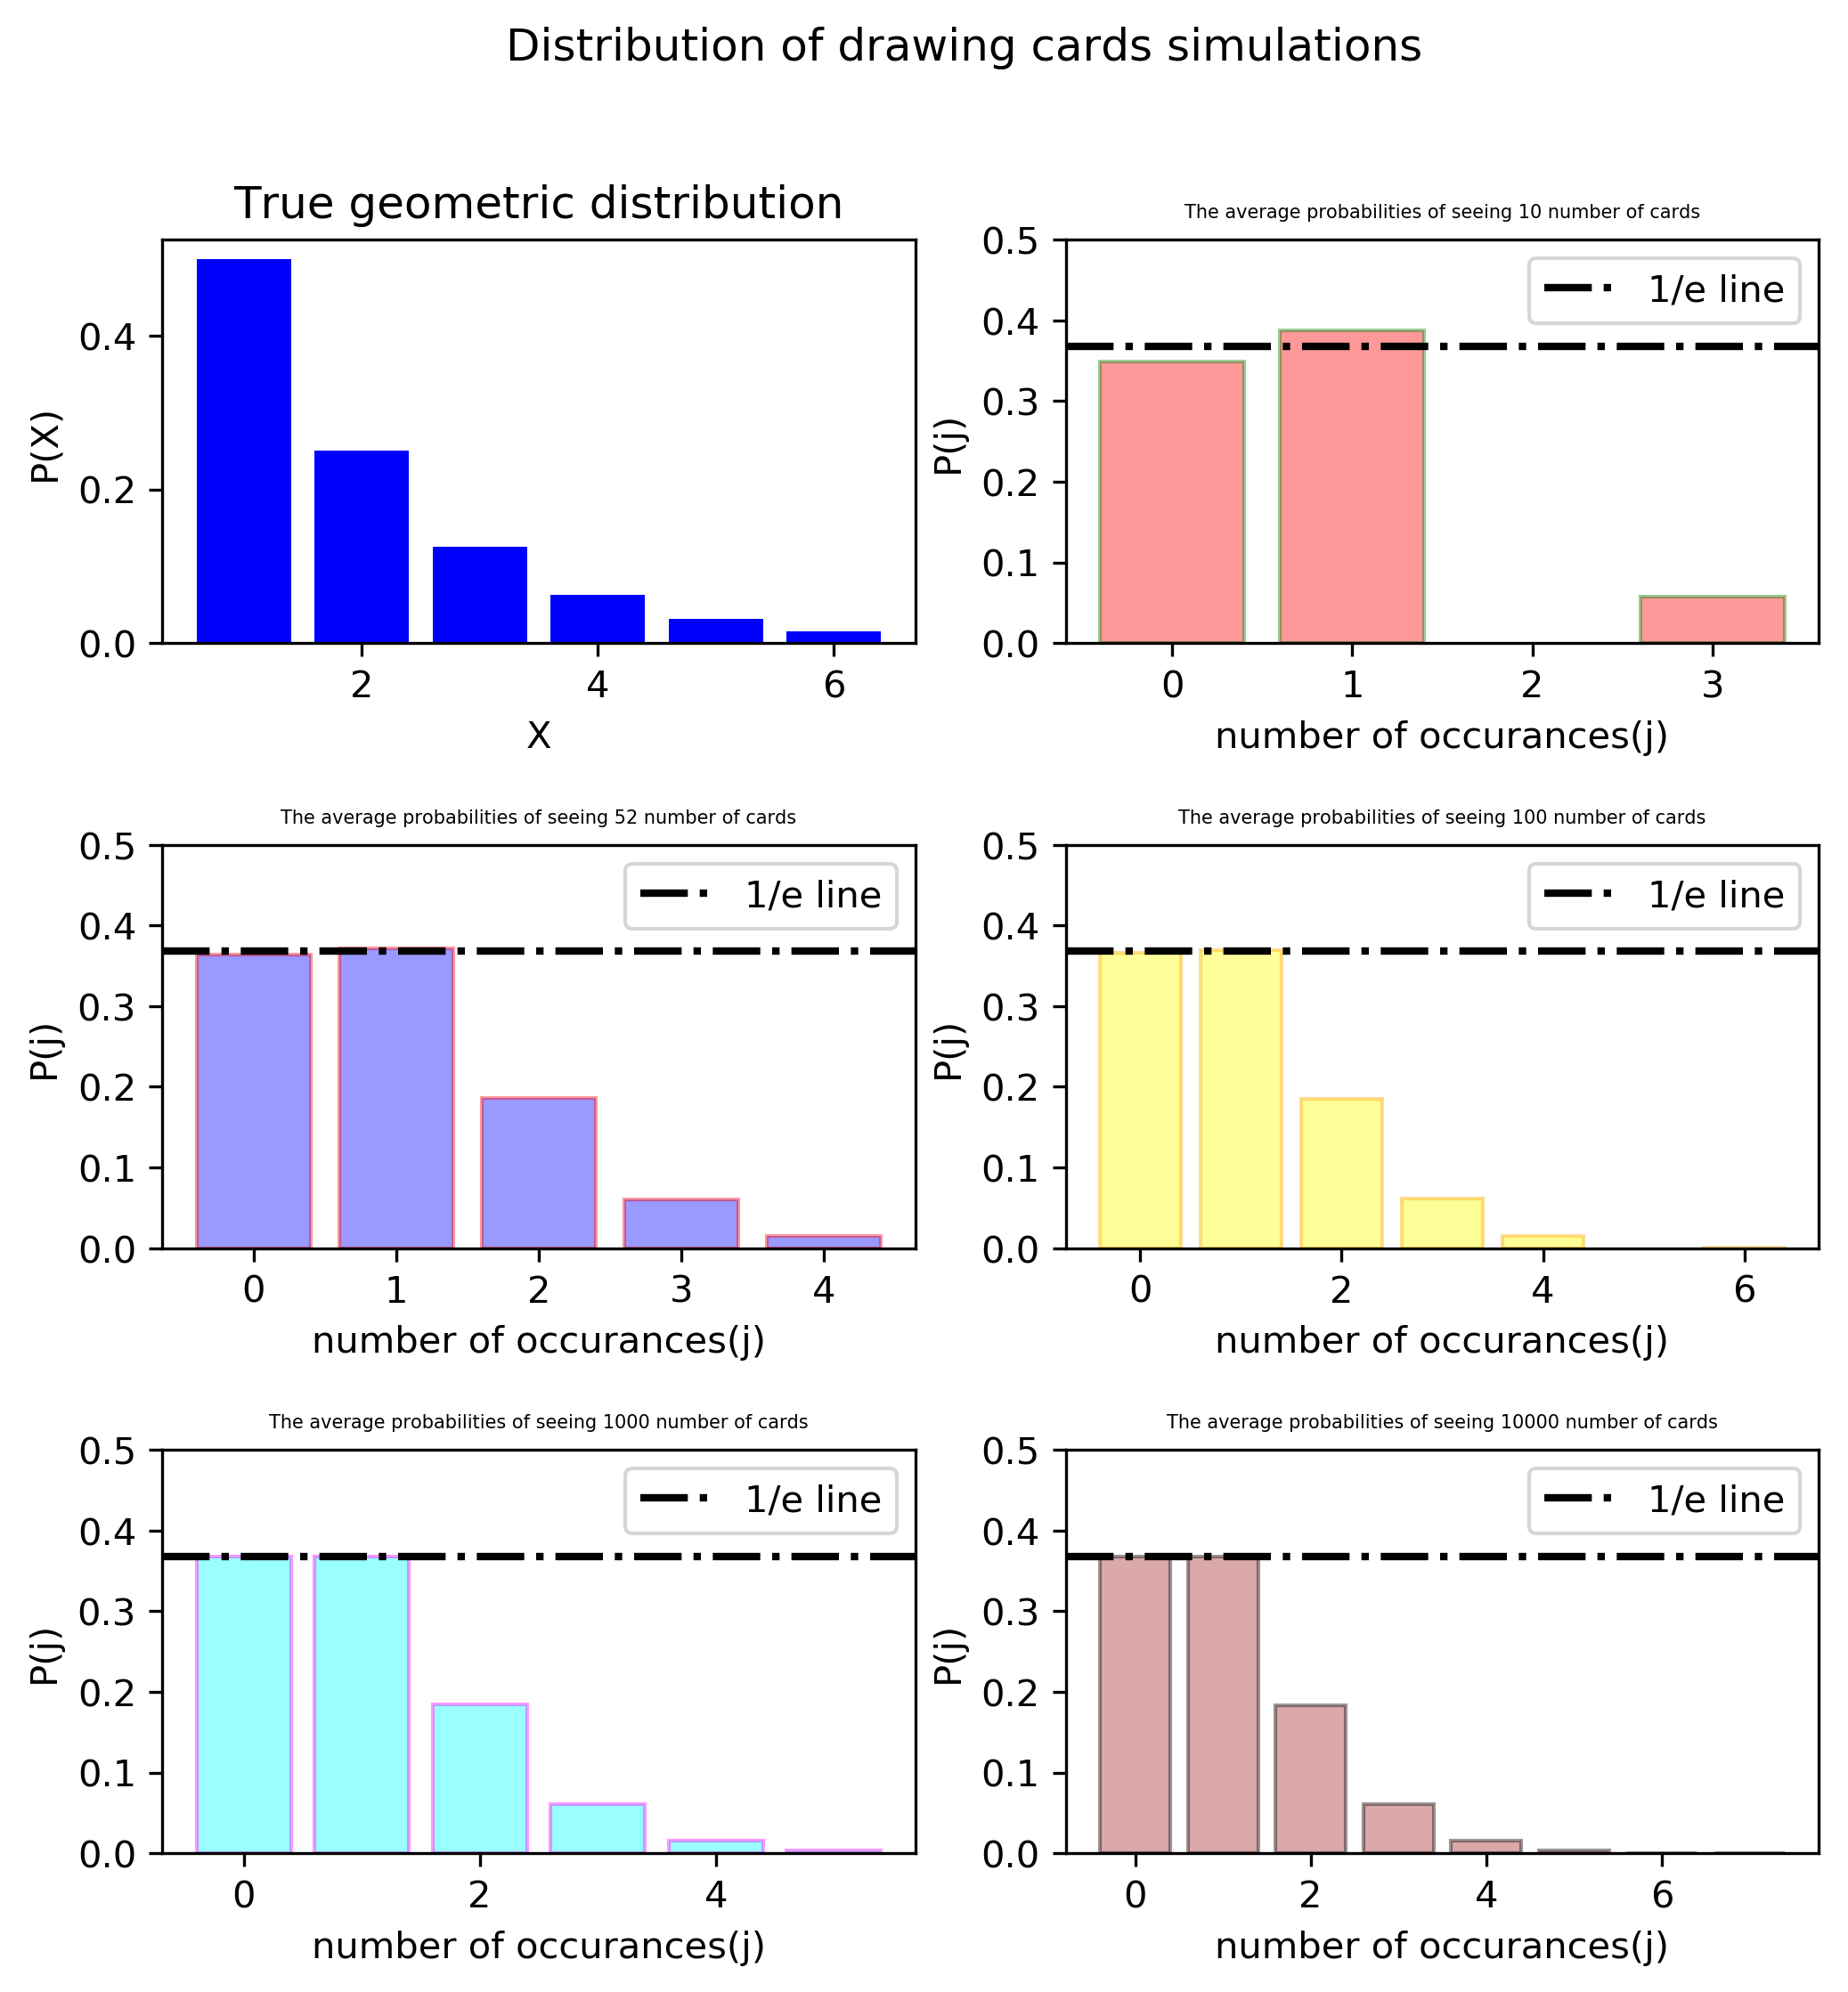

In [428]:
p = 0.5
mean, var, skew, kurt = geom.stats(p, moments='mvsk')
x = np.arange(geom.ppf(0.01, p),geom.ppf(0.99, p))
f, axes = plt.subplots(3,2,figsize=(8,8),dpi=300)
f.suptitle('Distribution of drawing cards simulations')
axes[0,0].bar(x, geom.pmf(x, p),color='blue')
axes[0,0].set_title('True geometric distribution')
axes[0,0].set_xlabel('X')
axes[0,0].set_ylabel('P(X)')

drawCards(10,axes[0,1],color='red',edgecolor='green',alpha=0.4)
drawCards(52,axes[1,0],color='blue',edgecolor='red',alpha=0.4)
drawCards(100,axes[1,1],color='yellow',edgecolor='orange',alpha=0.4)
drawCards(1000,axes[2,0],color='cyan',edgecolor='magenta',alpha=0.4)
drawCards(10000,axes[2,1],color='brown',edgecolor='black',alpha=0.4)
plt.show()

* $\textbf{Result}$: As we can see from the graphs above, for smaller samples the probability $P_o$ is just a slight bit off the $\frac{1}{e}$ value. However as we increase the sample size this value gets very close or almost equal to $\frac{1}{e}$.

* We are also intuitively correct in chosing the geometric random variable to model this case. If there are N cars the probability that any one of them would be chosen is very less. In such a case the probability of failure i.e the probability that a particular card would not be chosen becomes very high. And our graph shows this phenomena. That is the probability that any card would be chosen 0 times is the highest. Whereas the probability of choosing any card more than 0 time reduces very quickly, because it is highly unlikely that we could choose a card many number of times from a deck of 52 cards.

* Also since the probability of observing a card zero time is given by:

    * $\lim_{n\to\infty} (1-\frac{1}{n})^n = \frac{1}{e}$
    
    * As we increase the number of samples we are essentially going towards infinity and hence we finally start getting values closer to $\frac{1}{e}$ as the sample size increases. This is evident from the graph above. And finally the value of $\frac{1}{P_o}$ is the true value of 'e'.

## 3.)  Evaluating Integrals

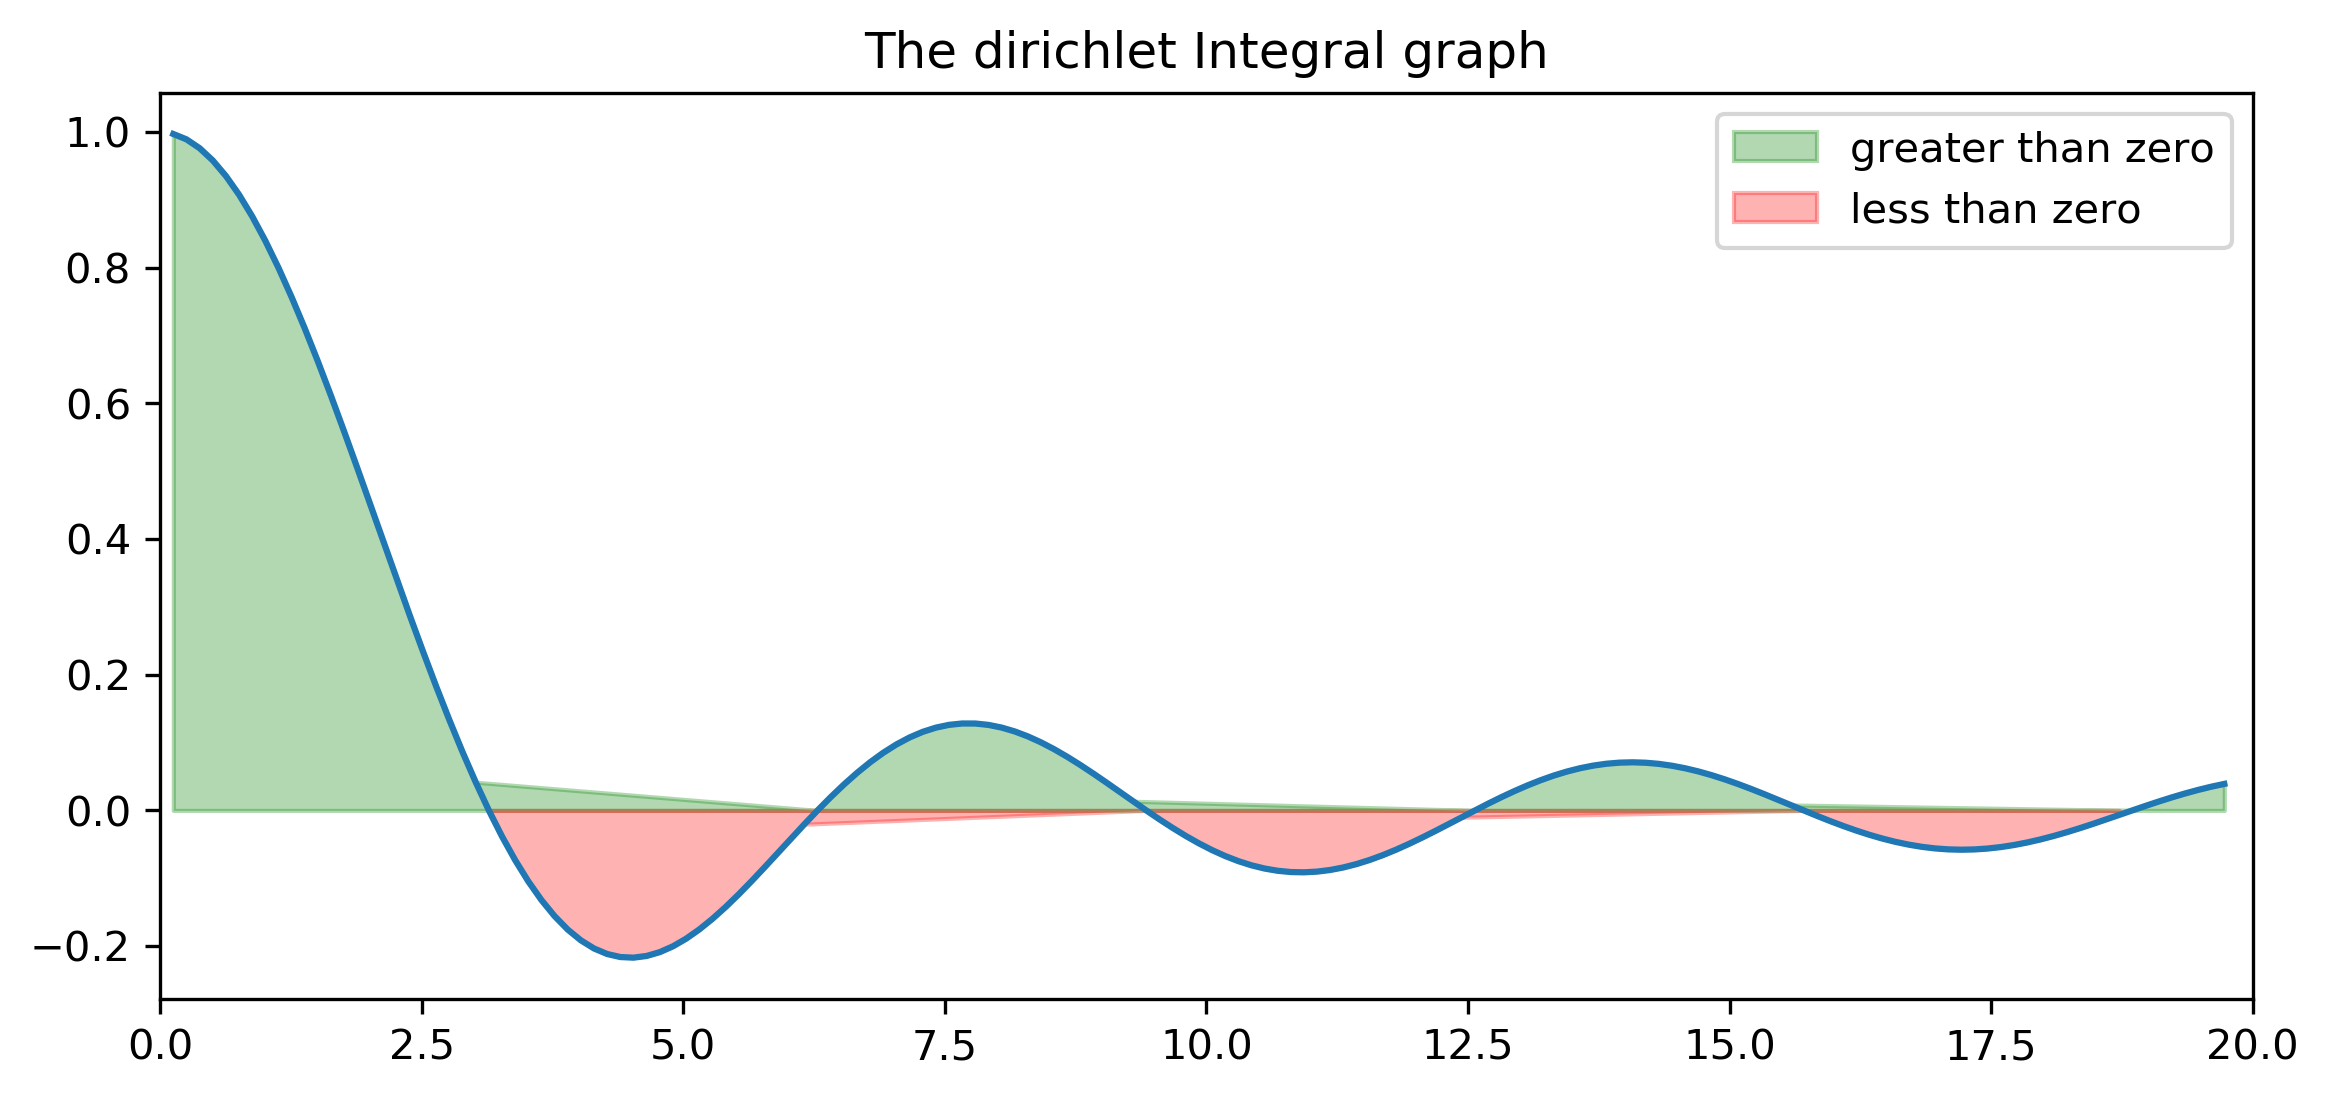

In [429]:
x = []
i=0
while (i<=np.pi):
    x.append(i)
    i = i+0.02
    
x = np.array(x)
x = 2*np.pi*x
y = np.sin(x)/x

y_pos = y[y>0]
x_pos = x[y>0]

y_neg = y[y<0]
x_neg = x[y<0]

plt.figure(figsize=(9,4),dpi=300)
plt.plot(x,y)
plt.xlim(0,20)
plt.fill_between(x_pos,0,y_pos,color='green',alpha=0.3,label='greater than zero')
plt.fill_between(x_neg,0,y_neg,color='red',alpha=0.3,label='less than zero')
plt.title('The dirichlet Integral graph')
plt.legend()
plt.show()


* As discussed earlier :
    
    * I = J * V =  $V * \lim_{k\to\infty} \sum_{i=1}^{k} f(x_i)$
    
    * Here $x_i$ are uniformly distributed between 0 and $\pi$.
    
    * Thus the value of V is ($\pi$-0) = $\pi$ 
    
    * Thus if k = 1000, we can expect that we would get a fairly good estimate of the integral. Below is the simulation code for k = 1000. 

In [435]:
import math
g_U = []
k = 1000
for i in range(k):
    U = np.random.uniform(0,np.pi)
    g_U.append(math.sin(U)/U)

g_U = np.array(g_U)

E_g_U = np.pi*(np.sum(g_U)/k)

print('The point estimate(Sample mean) is:',E_g_U)


The point estimate(Sample mean) is: 1.876170501627305


In [436]:
sample_var = np.sum((g_U-E_g_U)**2)/(k-1)
s_2 = sample_var/k
SE = np.sqrt(s_2)
print('Standard Error of the sample(Sample Standard Deviation is)',SE)

Standard Error of the sample(Sample Standard Deviation is) 0.041738835033993366


In [437]:
lower_bound = E_g_U - (SE*abs(st.norm.ppf(.025)))
upper_bound = E_g_U + (SE*abs(st.norm.ppf(.025)))
print('The 95% confidence interval is: ',lower_bound,' <= ',E_g_U,' <= ',upper_bound)

The 95% confidence interval is:  1.7943638882040194  <=  1.876170501627305  <=  1.9579771150505905


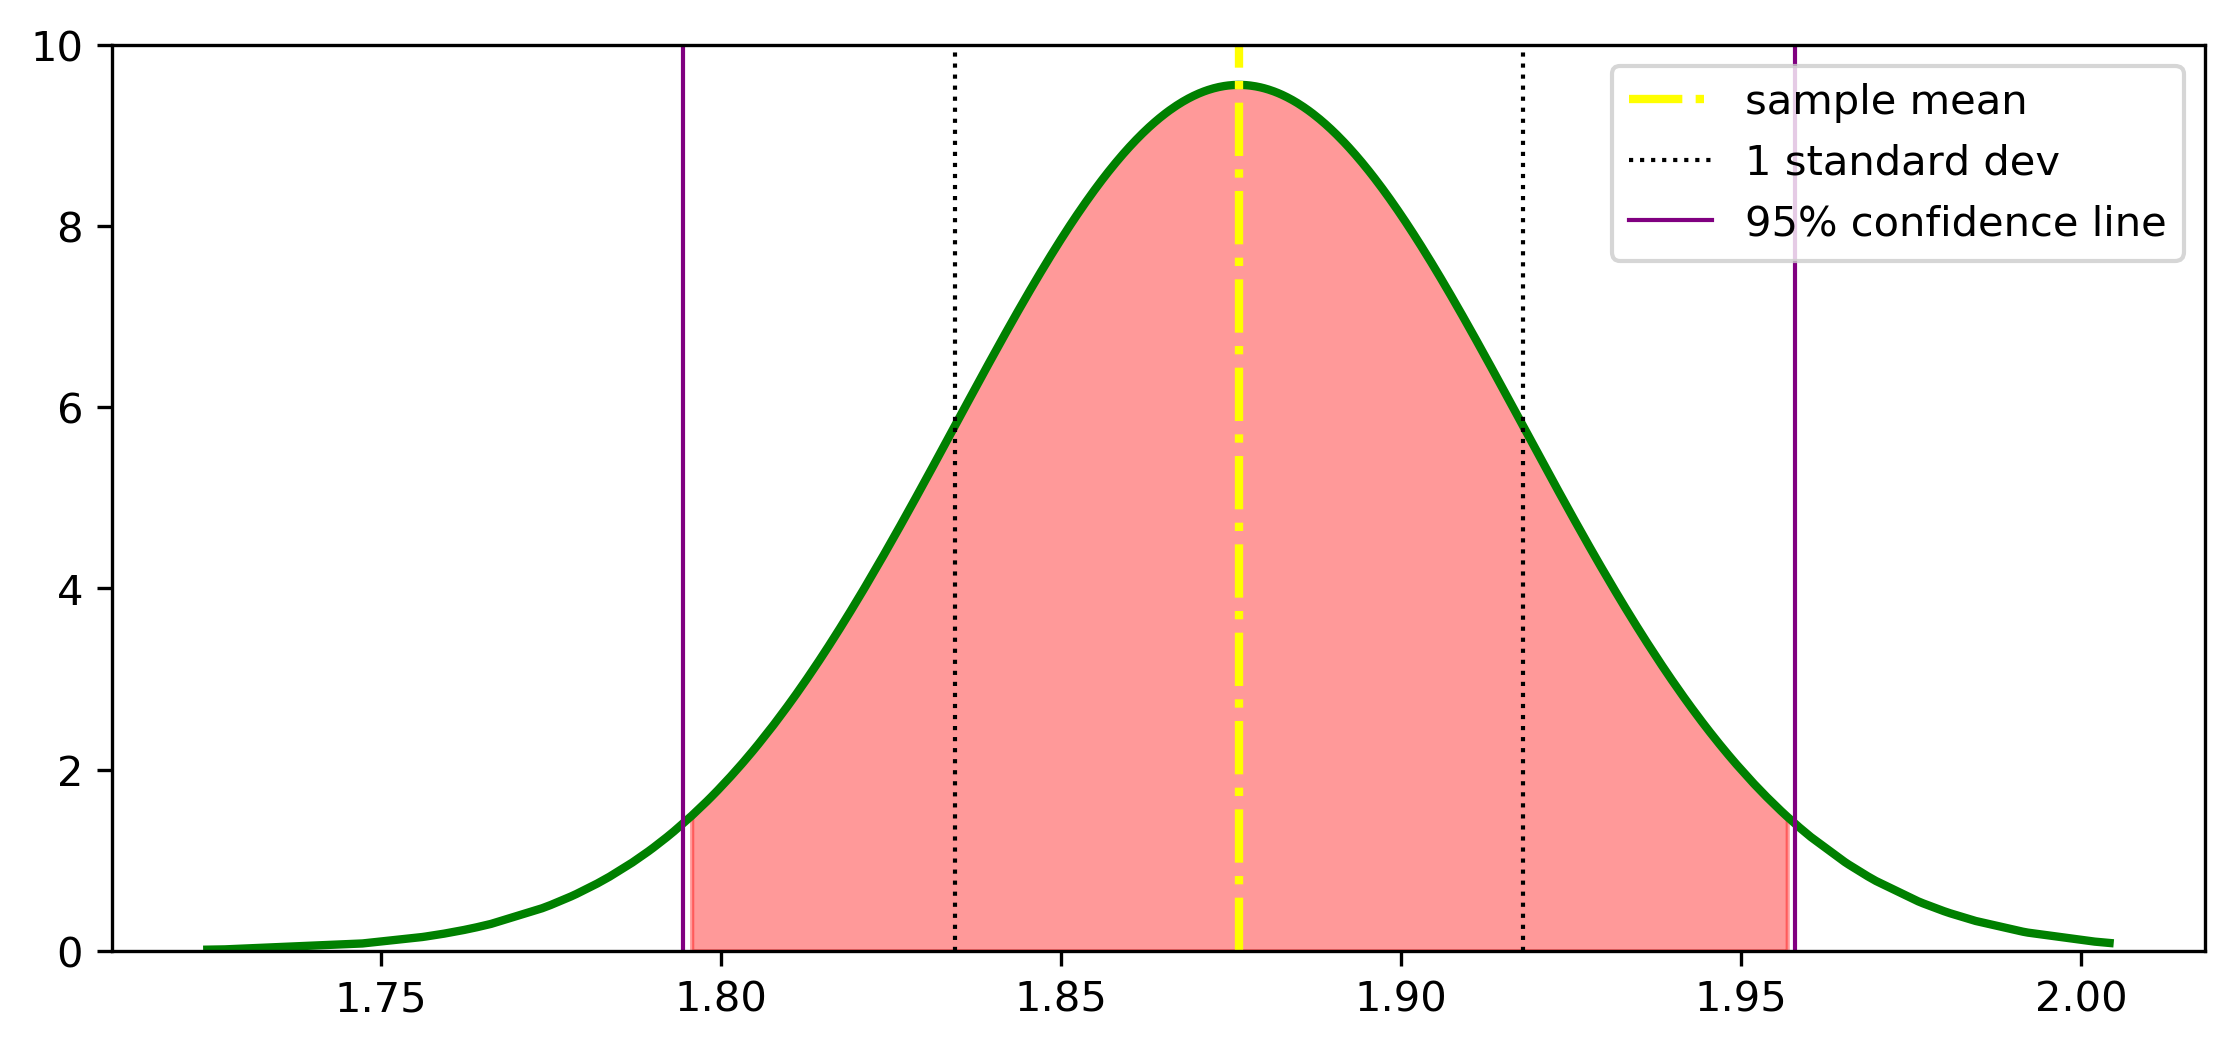

In [438]:
plot_norm(E_g_U,SE,1000,lower_bound,upper_bound)

* $\textbf{Result}$: The Monte Carlo method for integrals give us an estimate of the true definite integral values

|     Y_hat     | lower_bound         |  upper_bound         |
| :--------------:  | :-----------------: | :-----------------: |
|      1.876        |    1.794            |      1.957               |

* Thus we are 95 % confident that when we conduct the Monte Carlo integral method for k = 1000, then the true value of integral will lie between 1.779 and 1.942